<a href="https://colab.research.google.com/github/EduardoMoraesRitter/Introducao-NLP-classificacao/blob/master/NLP_analise_de_sentimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importar

https://www.kaggle.com/luisfredgs/imdb-ptbr

In [2]:
import pandas as pd

In [3]:
resenha = pd.read_csv('https://raw.githubusercontent.com/EduardoMoraesRitter/Introducao-NLP-analise-sentimento/master/IMDB_KAGGLE.CSV', delimiter=";", encoding='latin1')

resenha

,id,text_pt,sentiment
0,1,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...
49454,49456,"Como a média de votos era muito baixa, e o fat...",pos
49455,49457,O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together realmente veio antes do m...,pos


#Analise

In [4]:
#dados balanciados
resenha.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [5]:
#word cloud
%matplotlib inline

from wordcloud import WordCloud

palavras = " ".join([text for text in resenha.text_pt])
print(len(palavras))

nuvem = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(palavras)
print(nuvem)

63448424


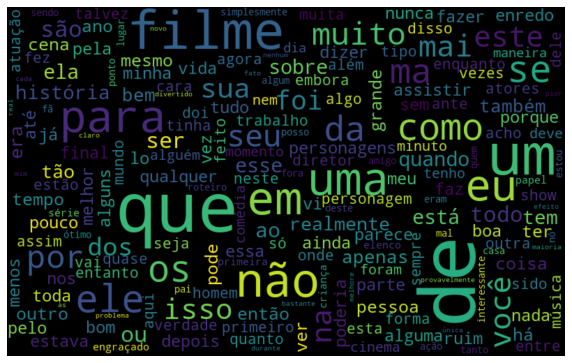

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis("off")
plt.show()

#biblioteca NLTK - frequancia e tokenização

In [15]:
import nltk
from nltk import tokenize

stemmer = nltk.RSLPStemmer()
tokenize_espaco_pontuacao = tokenize.WordPunctTokenizer()
corte_espaco = tokenize.WhitespaceTokenizer()

In [7]:
# teste de frase
frases = ["um filme legal!", "um filme ruim"]

frases = " ".join([text for text in frases])
print(frases)

tokens = tokenize_espaco_pontuacao.tokenize(frases)
print(tokens)

frequencia = nltk.FreqDist(tokens)
frequencia

um filme legal! um filme ruim
['um', 'filme', 'legal!', 'um', 'filme', 'ruim']


FreqDist({'filme': 2, 'legal!': 1, 'ruim': 1, 'um': 2})

In [16]:
nltk.download('stopwords') #remove palavras curtas
nltk.download('rslp') #raiz das palavras

from string import punctuation #remove pontuacao

stopwords = nltk.corpus.stopwords.words('portuguese')
pontuacao = list(punctuation)

#juntar com a lista de stop word
pontuacao_stopword = pontuacao + stopwords

!pip install Unidecode
from unidecode import unidecode #remove acento

pontuacao_stopword_minuscula_sem_acentos_steam = [unidecode(stemmer.stem(texto.lower())) for texto in pontuacao_stopword]
print(pontuacao_stopword_minuscula_sem_acentos_steam)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', 'de', 'a', 'o', 'que', 'e', 'e', 'do', 'da', 'em', 'um', 'par', 'com', 'nao', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'do', 'com', 'mas', 'ao', 'ele', 'da', 'a', 'seu', 'sua', 'ou', 'qu', 'muit', 'no', 'ja', 'eu', 'tambem', 'so', 'pel', 'pel', 'ate', 'iss', 'ela', 'entr', 'depois', 'sem', 'mesm', 'ao', 'seu', 'qu', 'na', 'me', 'ess', 'ele', 'voc', 'ess', 'num', 'nem', 'sua', 'meu', 'as', 'minh', 'num', 'pel', 'ela', 'qual', 'no', 'lhe', 'del', 'ess', 'ess', 'pel', 'est', 'del', 'tu', 'te', 'voc', 'vo', 'lhe', 'meu', 'minh', 'teu', 'tua', 'teu', 'tua', 'noss', 'noss', 'noss', 'noss', 'del', '

In [17]:
frase_processada = list()
for frase in resenha.text_pt:
  nova_frase = list()
  lista_palavras = tokenize_espaco_pontuacao.tokenize(frase)
  for palavra in lista_palavras:
      palavra_minuscula_sem_acentos_steam = unidecode(stemmer.stem(palavra.lower()))
      if palavra_minuscula_sem_acentos_steam not in pontuacao_stopword_minuscula_sem_acentos_steam:
        nova_frase.append(palavra_minuscula_sem_acentos_steam)
  frase_processada.append(' '.join(nova_frase))

resenha["tratado"] = frase_processada

In [18]:
resenha.head()

,id,text_pt,sentiment,tratado
0,1,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,vez sr costn arrum film temp necess alem terr ...
1,2,Este é um exemplo do motivo pelo qual a maiori...,neg,exempl motiv maior film aca gener chat nad val...
2,3,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg,prim tud odei rap imbecil pod agir arm pressio...
3,4,Nem mesmo os Beatles puderam escrever músicas ...,neg,beatl pud escrev music tod gost emb walt hill ...
4,5,Filmes de fotos de latão não é uma palavra apr...,neg,film fot lat palavr apropri verdad tant ous vi...


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(resenha.tratado)

#tratar dados

In [20]:
#transforma pra 0 e 1
resenha["classificacao"] = resenha['sentiment'].replace(["neg", "pos"], [0,1])
resenha.head()

,id,text_pt,sentiment,tratado,classificacao
0,1,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,vez sr costn arrum film temp necess alem terr ...,0
1,2,Este é um exemplo do motivo pelo qual a maiori...,neg,exempl motiv maior film aca gener chat nad val...,0
2,3,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg,prim tud odei rap imbecil pod agir arm pressio...,0
3,4,Nem mesmo os Beatles puderam escrever músicas ...,neg,beatl pud escrev music tod gost emb walt hill ...,0
4,5,Filmes de fotos de latão não é uma palavra apr...,neg,film fot lat palavr apropri verdad tant ous vi...,0


#teste de Conversão texto pra binario

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

texto_teste = ["Teste facilidar um filme ruim", "um Filme legal para um..."]

vetor_teste = CountVectorizer(lowercase=False)
bag_words = vetor_teste.fit_transform(texto_teste)

print(vetor_teste.get_feature_names())
print(bag_words)

#Shape of passed values
matriz_teste = pd.DataFrame.sparse.from_spmatrix(bag_words, columns=vetor_teste.get_feature_names())
matriz_teste

['Filme', 'Teste', 'facilidar', 'filme', 'legal', 'para', 'ruim', 'um']
  (0, 1)	1
  (0, 2)	1
  (0, 7)	1
  (0, 3)	1
  (0, 6)	1
  (1, 7)	2
  (1, 0)	1
  (1, 4)	1
  (1, 5)	1


,Filme,Teste,facilidar,filme,legal,para,ruim,um
0,0,1,1,1,0,0,1,1
1,1,0,0,0,1,1,0,2


#Conversão

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

#max_features diminui o tamanho de colunas e pega as palavras mas relevantes
vetorizar = CountVectorizer(lowercase=False, max_features=250)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

bag_of_words

(49459, 250)


<49459x250 sparse matrix of type '<class 'numpy.int64'>'
	with 2720563 stored elements in Compressed Sparse Row format>

#Separa Base de treino e teste

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, resenha['classificacao'], random_state = 42)
#treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, resenha['classificacao'], random_state = 42)
#treino, teste, classe_treino, classe_teste = train_test_split(resenha, resenha['sentiment'], random_state = 42)
print(treino.shape)
print(teste.shape)

(37094, 2353113)
(12365, 2353113)


#Modelo Logistic

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
regressa_logistica = LogisticRegression(solver = "lbfgs")
regressa_logistica.fit(treino, classe_treino)
acuracia = regressa_logistica.score(teste, classe_teste)
print(acuracia)

0.8833805095026284
